In [1]:
import numpy as np

In [64]:
import pandas as pd

In [229]:
usd = pd.read_csv('USD_RUB_60m.txt')
brent = pd.read_csv('BRENT_60m.txt')
american_finance = pd.read_csv('AMERICAN_FINANCE_60m.txt')
rtsi = pd.read_csv('RTSI_60m.txt')

In [235]:
rtsi_ds = rtsi[['<DATE>','<TIME>','<RTSI_HIGH>','<RTSI_LOW>']]
usd_ds = usd[['<DATE>','<TIME>','<USD_HIGH>','<USD_LOW>']]
brent_ds = brent[['<DATE>','<TIME>','<BRENT_HIGH>','<BRENT_LOW>']]
american_finance_ds = american_finance[['<DATE>','<TIME>','<AF_HIGH>','<AF_LOW>']]

In [236]:
total_ds = pd.merge(left = usd_ds, right = brent_ds, left_on=('<DATE>','<TIME>'), right_on=('<DATE>','<TIME>'), how='outer')

In [237]:
total_ds = total_ds.merge(american_finance_ds, left_on=('<DATE>','<TIME>'), right_on=('<DATE>','<TIME>'), how = 'outer')

In [238]:
total_ds = total_ds.merge(rtsi_ds, left_on=('<DATE>','<TIME>'), right_on=('<DATE>','<TIME>'), how='outer')

In [278]:
total_ds['<BRENT_LOW>']

count    24929.000000
mean        58.253411
std         11.556212
min         27.100000
25%         49.760000
50%         58.630000
75%         66.350000
max         86.140000
Name: <BRENT_LOW>, dtype: float64

In [241]:
import datetime

In [242]:
total_ds['<WEEK_DAY>'] = list(map(lambda x: (datetime.datetime.strptime(str(x),'%Y%m%d').isoweekday()),total_ds['<DATE>']))

In [248]:
total_ds['<HOUR>'] = list(map(lambda x: int(x / 10000), total_ds['<TIME>']))

In [256]:
total_ds['<MONTH>'] = list(map(lambda x: int(str(x)[4:6]), total_ds['<DATE>']))

In [266]:
total_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28557 entries, 0 to 28556
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <DATE>        28557 non-null  int64  
 1   <TIME>        28557 non-null  int64  
 2   <USD_HIGH>    26460 non-null  float64
 3   <USD_LOW>     26460 non-null  float64
 4   <BRENT_HIGH>  24929 non-null  float64
 5   <BRENT_LOW>   24929 non-null  float64
 6   <AF_HIGH>     24625 non-null  float64
 7   <AF_LOW>      24625 non-null  float64
 8   <RTSI_HIGH>   9738 non-null   float64
 9   <RTSI_LOW>    9738 non-null   float64
 10  <WEEK_DAY>    28557 non-null  int64  
 11  <HOUR>        28557 non-null  int64  
 12  <MONTH>       28557 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 3.1 MB


In [147]:
total_ds.columns[2]

'<HIGH>_x'

In [3]:
data = np.asarray(array[1:])
heads = array[0]

In [7]:
minutes = np.asarray([element[2:4] for element in time]).reshape(-1,1).astype(np.int32)
hours = np.asarray([element[:2] for element in time]).reshape(-1,1).astype(np.int32)

In [8]:
date = data[:,0]

In [9]:
year = np.asarray([element[:4] for element in date]).reshape(-1,1).astype(np.int32)
month = np.asarray([element[4:6] for element in date]).reshape(-1,1).astype(np.int32)
day = np.asarray([element[6:] for element in date]).reshape(-1,1).astype(np.int32)

In [10]:
data = np.delete(data,1,1)
data = np.delete(data,0,1)
# data = data.astype(np.float32)
data = np.hstack((year,month,day,hours,minutes,data))

In [11]:
train_data = data[:,5]

In [12]:
ds_x = []
ds_y = []
days_hist= 30
days_predict = 5
period = 24 * 4 * days_hist
period_predict = 24 * 4 * days_predict
for num,line in enumerate(train_data[:-(period+period_predict)]):
    ds_x.append(train_data[num:num+period].reshape((train_data[num:num+period].size)))
for line in train_data[period+period_predict:]:
    ds_y.append(line)

In [13]:
ds_x = np.asarray(ds_x, dtype = np.float16)
ds_y = np.asarray(ds_y, dtype = np.float16).reshape(-1,1)

In [14]:
idx = np.array(range(len(ds_y)))

In [15]:
np.random.shuffle(idx)

In [16]:
ds_x = ds_x[idx]
ds_y = ds_y[idx]

In [17]:
ds_x.shape

(102250, 2880)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
ds_x_train, ds_x_test, ds_y_train, ds_y_test =  train_test_split(ds_x, ds_y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:
linreg = LinearRegression(n_jobs = -1)
dtreg = DecisionTreeRegressor(max_depth = 100)
knreg = KNeighborsRegressor(n_neighbors=10, n_jobs = -1)
rfr = RandomForestRegressor(n_estimators=20, max_depth=40, n_jobs = -1)
mlpreg = MLPRegressor()

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
estimators = [linreg, dtreg, knreg, rfr, mlpreg]
names = []
scores = []
for estimator in estimators:
    names.append(str(estimator).split(sep = '(')[0])
    estimator.fit(ds_x_train,ds_y_train)
    scores.append(mean_squared_error(ds_y_train, estimator.predict(ds_x_train), squared = False))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
for name,score in zip(names,scores):
    print(name,score)

LinearRegression 1.5633942
DecisionTreeRegressor 0.0
KNeighborsRegressor 0.08136
RandomForestRegressor 0.09097668632017306
MLPRegressor 4.206659826161971


In [23]:
from sklearn.model_selection import cross_val_score

In [39]:
print(min(cross_val_score(linreg, ds_x_train, ds_y_train, cv=10, scoring='r2', n_jobs = -1)))

0.8797822510405815


In [40]:
print(min(cross_val_score(knreg, ds_x_train[:40000], ds_y_train[:40000], cv=5, scoring='r2', n_jobs = -1)))

[0.9992003  0.99925785 0.99922397 0.99922071 0.99928554]


In [41]:
print(min(cross_val_score(dtreg, ds_x_train[:40000], ds_y_train[:40000], cv=5, scoring='r2', n_jobs = -1)))

0.9808709015087994


In [43]:
print(min(cross_val_score(rfr, ds_x_train[:40000], ds_y_train[:40000], cv=5, scoring='r2', n_jobs = -1)))

0.9943153384309652


In [22]:
knreg.fit(ds_x_train,ds_y_train)
predicted_values_knreg = knreg.predict(ds_x_test)

In [23]:
dtreg.fit(ds_x_train,ds_y_train)
predicted_values_dtreg = dtreg.predict(ds_x_test)

In [42]:
mlpreg.fit(ds_x_train,ds_y_train)
predicted_values_mlp = mlpreg.predict(ds_x_test)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
linreg.fit(ds_x_train,ds_y_train)
predicted_values_lr = linreg.predict(ds_x_test)

kneighbours predictions - blue,
decision tree prediction - green

In [25]:
import matplotlib.pyplot as plt

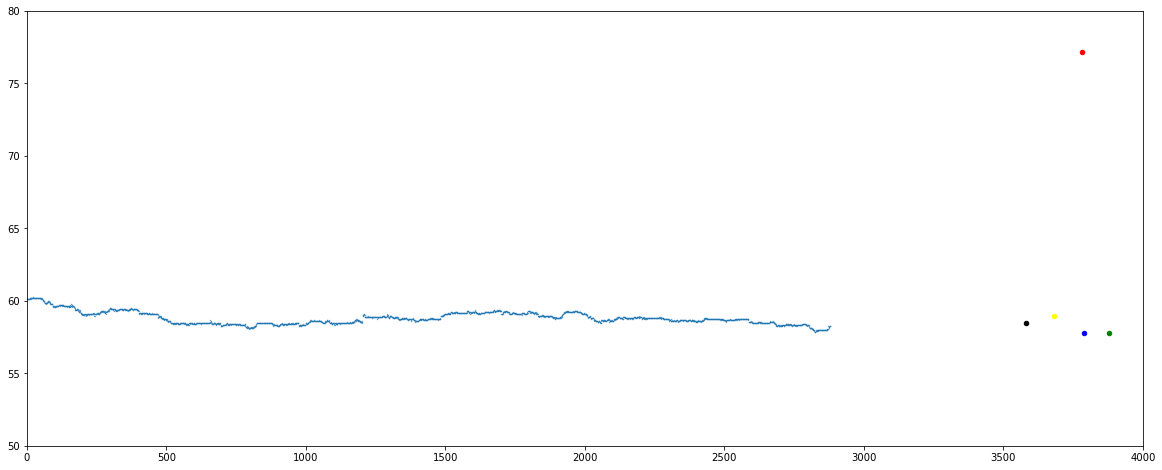

In [63]:
number = 11525
combination = ds_x_test[number]
length = len(combination)
plt.figure(figsize=(20,8))
plt.ylim(50,80)
plt.xlim(0,4000)
plt.scatter(range(length),combination,s=0.1)
plt.scatter(900+length, ds_y_train[number],s=20, color = 'red')
plt.scatter(900+length+10, predicted_values_knreg[number],s=20, color = 'blue')
plt.scatter(900+length+100, predicted_values_dtreg[number],s=20, color = 'green')
plt.scatter(900+length-100, predicted_values_mlp[number],s=20, color = 'yellow')
plt.scatter(900+length-200, predicted_values_lr[number],s=20, color = 'black')